#### Lib Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import visualise as vis
import algorythm as alg
import math
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/ПК2_18.02-25.02.csv', header=0, sep =',')

In [4]:
data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 1]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
#data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]

Text(0.5, 1.0, 'Зависимость распознанных событий id от времени')

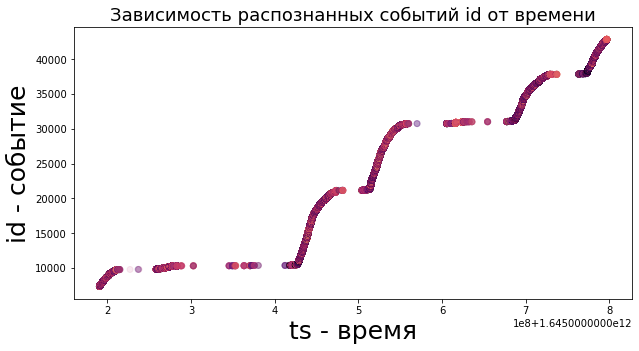

In [5]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['id'], c = data1['temperatureAvg'], cmap = "magma", alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('id - событие', fontsize = 25, color = 'black')
plot.set_title('Зависимость распознанных событий id от времени',  fontsize = 18, color = 'black')

Text(0.5, 1.0, 'Зависимость температуры распознанных событий от времени')

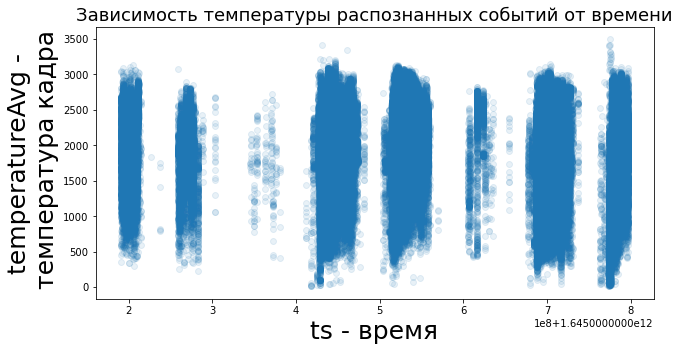

In [6]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')

plot.set_title('Зависимость температуры распознанных событий от времени',  fontsize = 18, color = 'black')

In [7]:
unique = data1['id'].unique()
mean = []
for item in unique:
    mean += [data1.loc[data1['id'] == item]['id'].count()]

In [8]:
model = f.Model(data1, 10)
model.filter(2)
data2 = model.df_all

In [9]:
clusters = alg.clusterise(data1,number_of_clusters=5)
clusters1 = alg.clusterise(data2,number_of_clusters=5)

Text(0.5, 1.0, 'Кластеризация событий по времени')

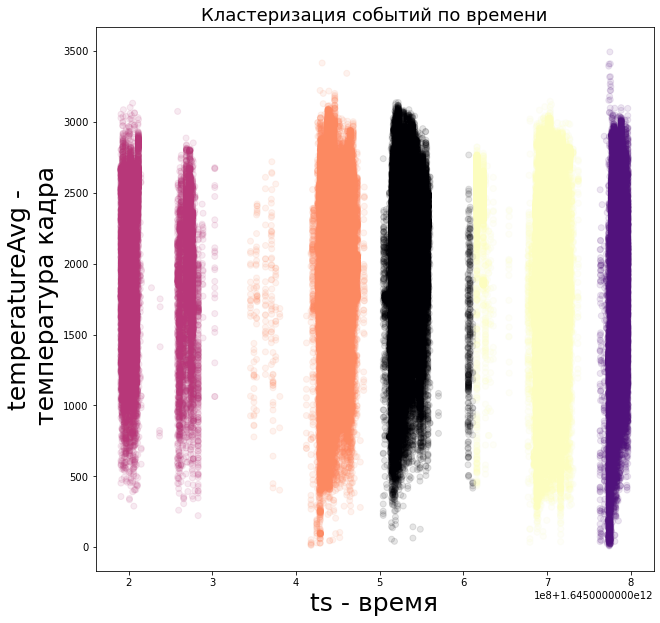

In [11]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], c = data1['cluster'],alpha=0.1, cmap = "magma")
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')
plot.set_title('Кластеризация событий по времени',  fontsize = 18, color = 'black')

In [21]:
main_mean_list = f.mean_list(data1)
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 50, ratio = 0)
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10000, ratio=0)
border = algo_set_avg + mean_set_avg

In [2]:
t = np.arange(0,500000)
def fum(x):
    flag = np.random.random() > 0.8
    if not flag:
        temp = np.random.normal(2500 + 0.01*(x%10000),20)
    else:
        temp = 2500 + 0.01*(x%10000) + np.random.normal(50, 10)
    return temp, flag * 1

In [3]:
vecfunc = np.vectorize(fum)

In [4]:
o = vecfunc(t)

In [5]:
export_df = pd.DataFrame({'temperatureAvg' : o[0], 'markup' : o[1]})

In [6]:
export_df.describe()

,temperatureAvg,markup
count,500000.000000,500000.000000
mean,2560.023739,0.200140
std,39.654933,0.400105
min,2420.867838,0.000000
25%,2530.783311,0.000000
50%,2559.966966,0.000000
75%,2587.682066,0.000000
max,2683.439642,1.000000


In [7]:
export_df.to_csv('./dataset/generated.csv')